# **Machine Learning Practice 1**
# **Clustering** #

## Objectives

* Practice Machine Learning Techniques with Practical examples

## Inputs

* Raw Datasets 

## Outputs

* Write here which files, code or artefacts you generate by the end of the notebook 

## Additional Comments

* If you have any additional comments that don't fit in the previous bullets, please state them here. 



---

# Change working directory

* We are assuming you will store the notebooks in a subfolder, therefore when running the notebook in the editor, you will need to change the working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\ML_practice\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\mikee\\Desktop\\ML_practice'

# Section 1

Cluster Pipeline

(Functions copied from Codeinstitute LMS)

In [4]:
##Import learning packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

Import dataset for pipeline


---

### Workflow ###

* 1 - Create a Cluster Pipeline that contains the following steps: data cleaning, feature engineering, feature scaling, PCA and Cluster Model (KMeans). Note: this pipeline has parameters for PCA and Cluster that we will need to update within the notebook.
* 2 - Analyse to determine the number of components in a PCA. We will update that value in the Cluster Pipeline
* 3 - Apply Elbow Method and evaluate the Silhouette score, to define the number of clusters in Cluster Pipeline
* 4 - Fit the cluster pipeline
* 5 - Add the cluster predictions to the data
* 6 - Create a separate Classifier Pipeline, where the target variable is cluster predictions and features are the remaining variables
* 7 - Fit this classifier, evaluate its performance and assess the most important features. These features are the most important features needed to define the cluster predictions
* 8 - Cluster analysis: explain each cluster profile in terms of the most important features from the previous step. In addition, in a case where your dataset has a separate variable you want to study and you didn't include in the cluster pipeline, you can study how this variable correlates to the clusters.


### Import Dataset ###

In [5]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
df = pd.DataFrame(data.data,columns=data.feature_names)
df.iloc[:10,4] = np.NaN
print(df.shape)
df.head()

(569, 30)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,NaN,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,NaN,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,NaN,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,NaN,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,NaN,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### ML Pipeline for Cluster ###

The Cluster Pipeline consists of Data Cleaning (median imputation on mean smoothness), feature scaling, PCA and model (KMeans) steps

In [6]:
## Create cluster pipeline
from sklearn.pipeline import Pipeline

### Data Cleaning
from feature_engine.imputation import MeanMedianImputer

### Feat Scaling
from sklearn.preprocessing import StandardScaler

### PCA
from sklearn.decomposition import PCA

### ML algorithm
from sklearn.cluster import KMeans

def PipelineCluster():
  pipeline_base = Pipeline([
                            
      ( 'MeanMedianImputer', MeanMedianImputer(imputation_method='median',
                                               variables=['mean smoothness']) ),

      ("scaler", StandardScaler()  ),    

      ("PCA",  PCA(n_components=50, random_state=0)), 

      ("model", KMeans(n_clusters=50, random_state=0)  ), 
  ])
  return pipeline_base

PipelineCluster()

Pipeline(steps=[('MeanMedianImputer',
                 MeanMedianImputer(variables=['mean smoothness'])),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=50, random_state=0)),
                ('model', KMeans(n_clusters=50, random_state=0))])

### Principal Component Analysis (PCA) ###

Principal Component Analysis, or PCA, transforms data and attempts to determine what features explain the most variance.

* PCA reduces the number of variables, while it preserves as much information as possible. After the transformation, it creates a set of components, where each component contains the relevant information from the original variables.
* PCA's role in a Cluster pipeline is not just to reduce the feature space but also to provide data to the model in a format that the algorithm can easily group. This practical application makes PCA a valuable tool in your data analysis arsenal.

Determining the most suitable n_components is a crucial step in the ML Pipeline for Cluster. This step significantly impacts the performance of your model, making it a key consideration in your data analysis process.

* To reach that, we will create an object based on PipelineCluster(), then remove the last two steps (PCA and model): .steps[:-2]
* Finally, the pipeline_pca scales the data, so we can apply PCA afterwards.

In [7]:
##Create pipeline without PCA and model to determine n_components
pipeline_cluster = PipelineCluster()
pipeline_pca = Pipeline(pipeline_cluster.steps[:-2])
df_pca = pipeline_pca.fit_transform(df)

print(df_pca.shape,'\n', type(df_pca))

(569, 30) 
 <class 'numpy.ndarray'>


Next, we apply PCA separately to the scaled data.

Next, we are interested in defining the number of components from the PCA step. We will set the number of components as the number of columns the scaled data has, in this case, thirty. That is useful in understanding the explained variance of each component.

In [8]:
n_components = 30 # set the number of components as all columns in the data

pca = PCA(n_components=n_components).fit(df_pca)  # set PCA object and fit to the data
x_PCA = pca.transform(df_pca) # array with transformed PCA


# the PCA object has .explained_variance_ratio_ attribute, which tells 
# how much information (variance) each component has 
# We store that to a DataFrame relating each component to its variance explanation
ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data= np.round(100 * pca.explained_variance_ratio_ ,3),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)'])

# prints how much of the dataset these components explain (naturally in this case will be 100%)
PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
print(dfExplVarRatio)

* The 30 components explain 100.0% of the data 

              Explained Variance Ratio (%)
Component 0                         44.207
Component 1                         18.858
Component 2                          9.361
Component 3                          6.612
Component 4                          5.482
Component 5                          4.094
Component 6                          2.285
Component 7                          1.613
Component 8                          1.390
Component 9                          1.165
Component 10                         0.976
Component 11                         0.895
Component 12                         0.806
Component 13                         0.572
Component 14                         0.315
Component 15                         0.275
Component 16                         0.195
Component 17                         0.183
Component 18                         0.166
Component 19                         0.104
Component 20                         0.103
Compo

In the next cell, we just copied the code from the cell above and changed n_components to 7. These 7 explain 90% of variance

In [9]:
n_components = 7

pca = PCA(n_components=n_components).fit(df_pca)
x_PCA = pca.transform(df_pca)

ComponentsList = ["Component " + str(number) for number in range(n_components)]
dfExplVarRatio = pd.DataFrame(
    data= np.round(100 * pca.explained_variance_ratio_ ,3),
    index=ComponentsList,
    columns=['Explained Variance Ratio (%)'])

PercentageOfDataExplained = dfExplVarRatio['Explained Variance Ratio (%)'].sum()

print(f"* The {n_components} components explain {round(PercentageOfDataExplained,2)}% of the data \n")
print(dfExplVarRatio)

* The 7 components explain 90.9% of the data 

             Explained Variance Ratio (%)
Component 0                        44.207
Component 1                        18.858
Component 2                         9.361
Component 3                         6.612
Component 4                         5.482
Component 5                         4.094
Component 6                         2.285


Next we rewrite the PipelineCluster(), updating n_components to 7

Note, in an actual project, you don't have to rewrite in the cell below the pipeline necessarily. You could have scrolled up to the cell where we defined the pipeline previously and updated there. But for learning purposes, we'll rewrite the pipeline in the cell below.

In [10]:
def PipelineCluster():
  pipeline_base = Pipeline([
                            
      ( 'MeanMedianImputer', MeanMedianImputer(imputation_method='median',
                                               variables=['mean smoothness']) ),

      ("scaler", StandardScaler()  ),    

      ("PCA",  PCA(n_components=7, random_state=0)),  ##### we update the n_components to 7

      ("model", KMeans(n_clusters=30, random_state=0)  ), 
  ])
  return pipeline_base

PipelineCluster()

Pipeline(steps=[('MeanMedianImputer',
                 MeanMedianImputer(variables=['mean smoothness'])),
                ('scaler', StandardScaler()),
                ('PCA', PCA(n_components=7, random_state=0)),
                ('model', KMeans(n_clusters=30, random_state=0))])

## **Elbow Method and Silhouette Score** ##

We are now interested in finding the most suitable value for n_clusters, which we will then update on the ML Pipeline for Cluster.

But how do you know the optimal amount of clusters for your data?
We will combine two techniques (Elbow Method and the Silhouette Score) to find the optimal number of clusters. Both suggest values, and we will use them in conjunction to decide on the optimal number of clusters.
We will first explain and apply Elbow. Then, we will explain and apply the Silhouette score.

There is a technique called the Elbow Method. According to Yellowbrick documentation (an ML visualisation library), the elbow method runs k-means clustering on the dataset for a range of values for k and then computes an average score for all clusters for each value of k. By default, the distortion score is computed as the sum of square distances from each point to its assigned centre.

* That is plotted as a line chart, where on the x-axis, you find the values for the number of clusters and on the y-axis, the distortion score. The line chart will remind you of an arm, and then you will pick as a candidate the point of inflexion (or the elbow) as the optimal value for the number of clusters.
* You will also observe the plot and look at the values where the distances sharply and steeply fall. These ranges will be used in the Silhouette Score analysis.

Prepare data for analysis

You need to transform your data until it hits the model for the Elbow Method and Silhouette score.
* Therefore we remove the last step (.steps[:-1]) and fit_transform pipeline_analysis to the data.
* Note the data has seven columns since it has passed through the PCA step.

In [11]:
#create pipeline cluster with last step removed
pipeline_cluster = PipelineCluster()
pipeline_analysis = Pipeline(pipeline_cluster.steps[:-1])
df_analysis = pipeline_analysis.fit_transform(df)

print(df_analysis.shape,'\n', type(df_analysis))

(569, 7) 
 <class 'numpy.ndarray'>


Next, we use KElbowVisualizer() from YellowbrickElbow Analysis to implement the Elbow Method.

* We pass in as arguments the algorithm we want (KMeans) and the range for the number of clusters we want to try, in this case from 1 to 10, so we pass in a tuple of (1,11), where the last value is not inclusive.
* There is no fixed recipe here; you have to try a few ranges for the number of clusters. Initially, you may try a range of 1 to 10 or 1 to 15 and refine it accordingly.
* Then, we fit this object to the df_elbow (the data that passed through data cleaning, feature scaling and PCA)

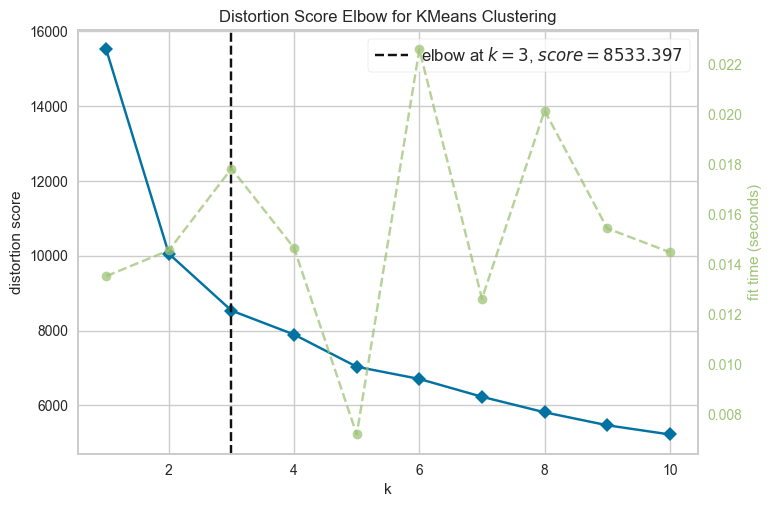

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
##added n_init="auto" to avoid warning
visualizer = KElbowVisualizer(KMeans(random_state=0, n_init="auto"), k=(1,11))
visualizer.fit(df_analysis) 
visualizer.show() 
plt.show()

There is also a Silhouette score that helps us define the number of clusters.

* The silhouette score interprets and validates the consistency within clusters, which is based on the mean intra-cluster distance and mean nearest-cluster distance for each data point.
* The mean intra-cluster distance is the average distance between the data point and all other data points in the same cluster. Essentially, how far each data point is from the centre of its own cluster.
* The mean nearest-cluster distance, on the other hand, is the average distance between the data point and all other data points of the next nearest cluster. In other words, how far each data point in 1 cluster is to the centre of its nearest neighbouring cluster.


The silhouette score range is from -1 to +1, where:

* “+1” means that a clustered data point is dense and properly separated from other clusters.
* A score close to 0 means the clustered data point overlaps with another cluster.
* A negative score means that the clustered data point may be wrong; it may even belong to another cluster.

The silhouette score for each data point allows you to build a Silhouette plot, showing each silhouette score for each data point across all clusters.

* You can then calculate an average silhouette score for the plot. This average helps to (1) compare different models with a different number of clusters and (2) define a performance metric for a given cluster model. A rule of thumb in the industry is that an average silhouette score greater than 0.5 means the clusters are nicely separated. Still, there may be a case where, for your dataset, the optimal amount of cluster leads to an average lower than 0.5. That is fine also. It just means we computed the optimal way for that dataset to cluster even though it doesn't have a tremendous silhouette score.
* To evaluate a cluster's silhouette, we need the data formatted before it hits the model. We have done this already, and the result is stored at df_analysis

The code has the following logic:

* First calculate the average silhouette score for different numbers of clusters using KElbowVisualizer() by setting KMeans() as the algorithm, the range 2 to 5 for the number of clusters (it doesn't accept 1 cluster) and the metric='silhouette'. Then you will fit the scaled data (df_analysis) and show the results.
    * You will evaluate which number of clusters produce the higher average silhouette score.
* Then, you will iterate on the silhouette plot for models with a different number of clusters, in this case from 2 to 11. You will use SilhouetteVisualizer() and set the estimator as KMeans(). Then, you will fit the scaled data (df_analysis) and show the results
    * You will evaluate whether there are clusters with a maximum score below the average score, whether the silhouette values vary too much in the cluster, whether there are too many silhouette values lower than the average silhouette score, and whether there are too many negative silhouette values.

=== Average Silhouette Score for different number of clusters ===


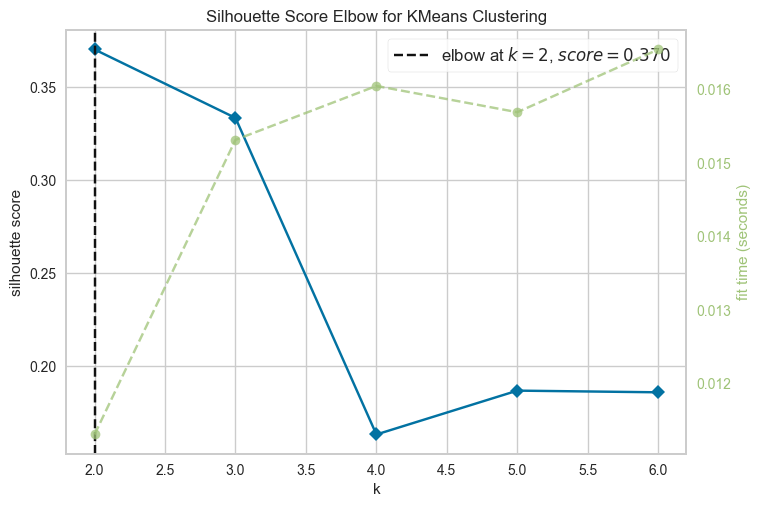



=== Silhouette plot for 2 Clusters ===


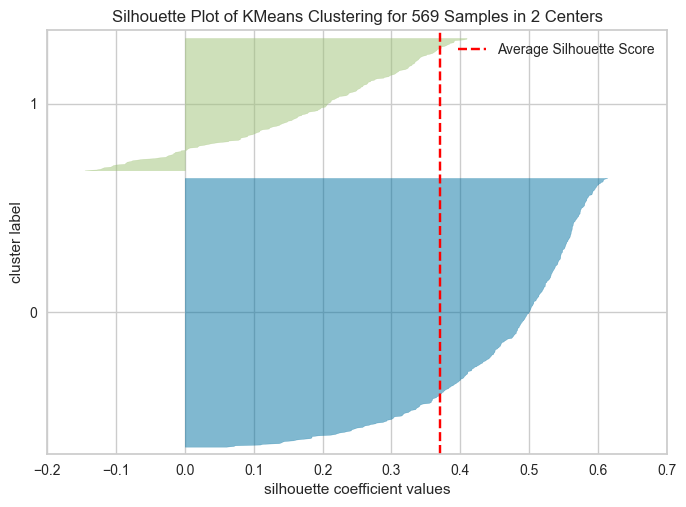



=== Silhouette plot for 3 Clusters ===


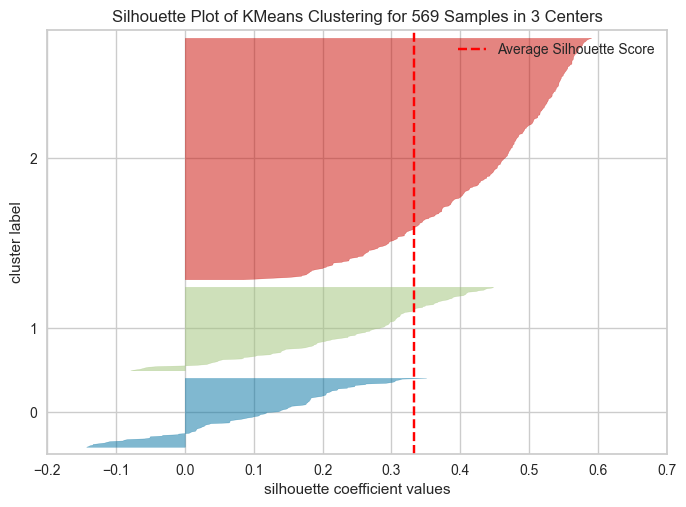



=== Silhouette plot for 4 Clusters ===


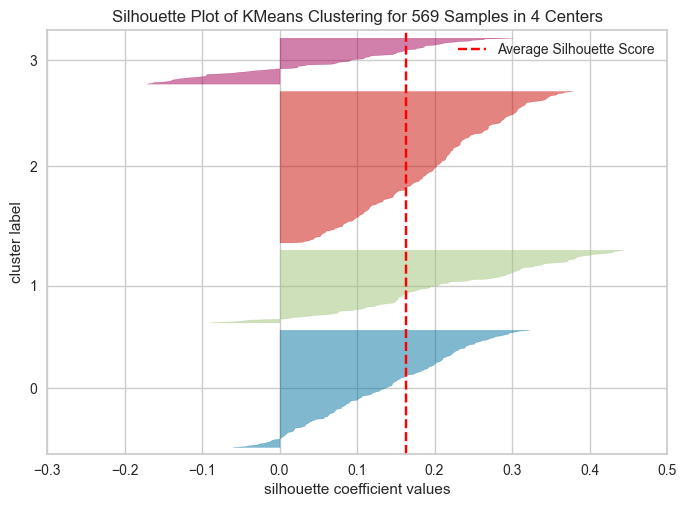



=== Silhouette plot for 5 Clusters ===


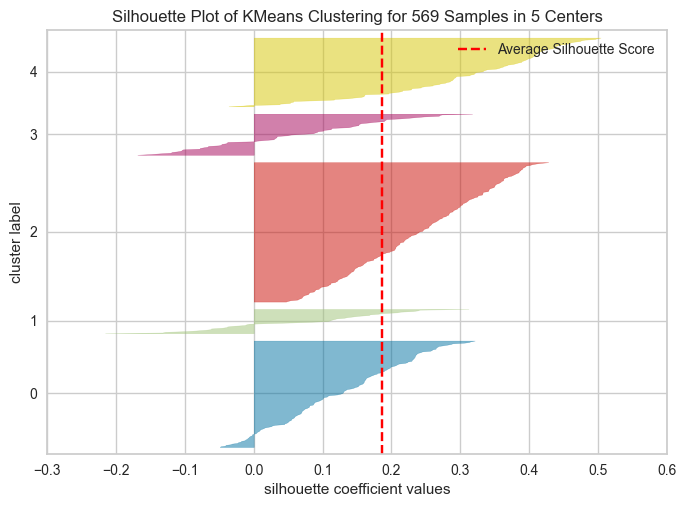



=== Silhouette plot for 6 Clusters ===


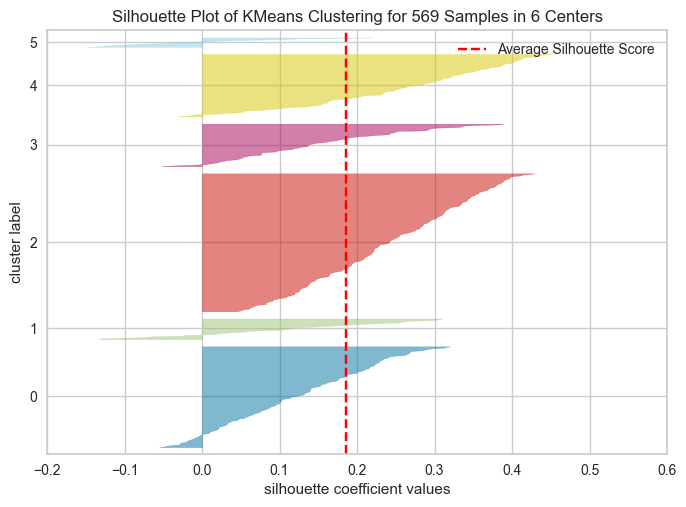



=== Silhouette plot for 7 Clusters ===


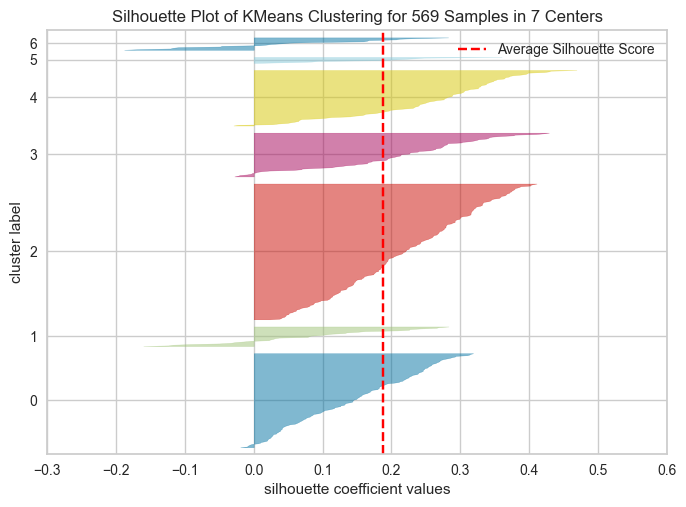



=== Silhouette plot for 8 Clusters ===


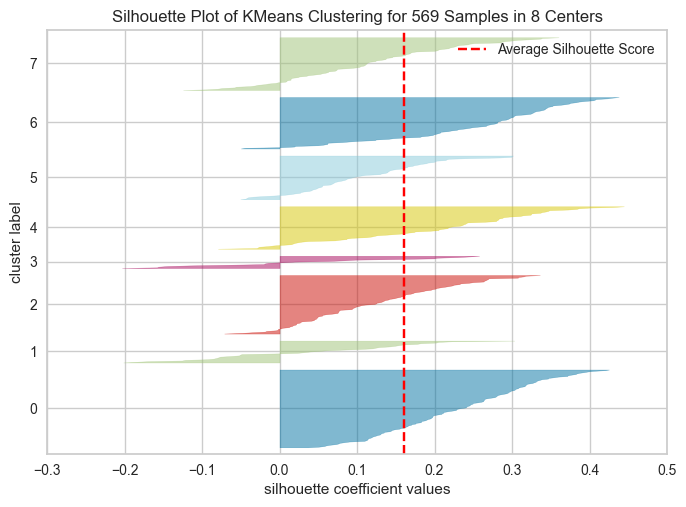



=== Silhouette plot for 9 Clusters ===


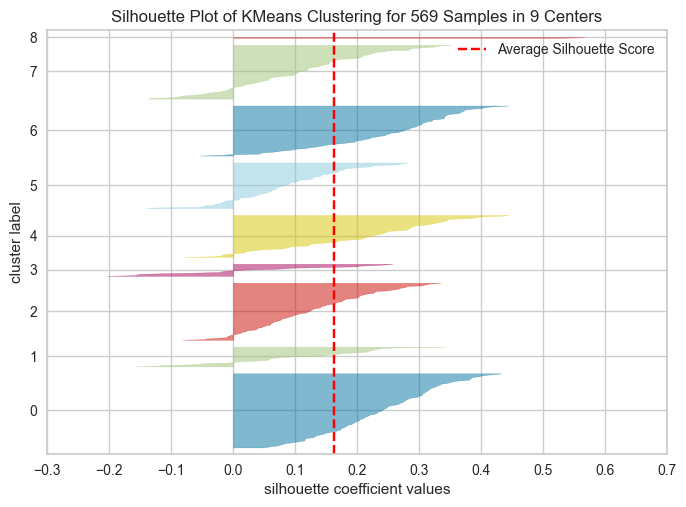



=== Silhouette plot for 10 Clusters ===


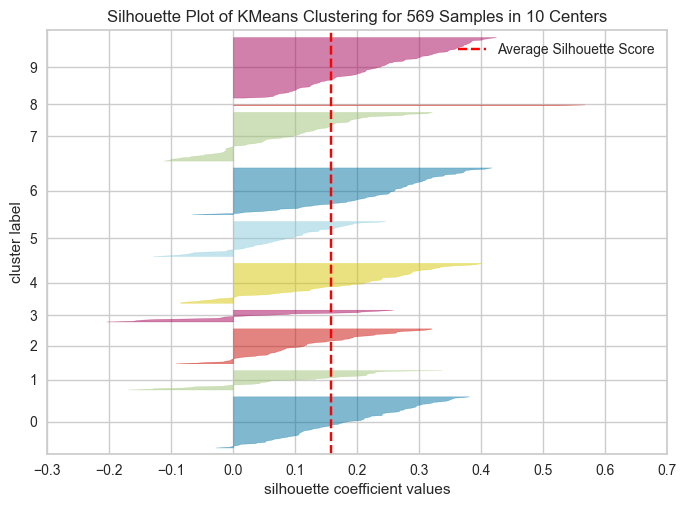

In [ ]:
##plot silhouette score for different number of clusters
from yellowbrick.cluster import SilhouetteVisualizer
###added n_init="auto" to avoid warning to KMeans arguments
print("=== Average Silhouette Score for different number of clusters ===")
visualizer = KElbowVisualizer(KMeans(random_state=0, n_init="auto"), k=(2,7), metric='silhouette')
visualizer.fit(df_analysis) 
visualizer.show() 
plt.show()
print("\n")

for n_clusters in np.arange(start=2,stop=11):
  
  print(f"=== Silhouette plot for {n_clusters} Clusters ===")
  visualizer = SilhouetteVisualizer(estimator = KMeans(n_clusters=n_clusters, random_state=0, n_init="auto"),
                                    colors = 'yellowbrick')
  visualizer.fit(df_analysis)
  visualizer.show()
  plt.show()
  print("\n")

---

NOTE

* You may add as many sections as you want, as long as it supports your project workflow.
* All notebook's cells should be run top-down (you can't create a dynamic wherein a given point you need to go back to a previous cell to execute some task, like go back to a previous cell and refresh a variable content)

---

# Push files to Repo

* In cases where you don't need to push files to Repo, you may replace this section with "Conclusions and Next Steps" and state your conclusions and next steps.

In [13]:
import os
try:
  # create your folder here
  # os.makedirs(name='')
except Exception as e:
  print(e)


IndentationError: expected an indented block after 'try' statement on line 2 (553063055.py, line 5)